# Đồ án: Ứng dụng phân tích dữ liệu thông minh

Thành viên nhóm: <tên> bao gồm:
- MSSV: <Họ tên>

# A. Giới thiệu đề tài

## 1. Ngữ cảnh

Hiện trạng: 

Chọn đề tài để:


## 2. Thu thập và mô tả dữ liệu

Dữ liệu được thu thập từ trang ...., bằng API. 

Dữ liệu Spotify các nước đông nam á(...), có các trường tiêu biểu 
- 
- 
- 


# B. Bài phân tích

## 0. Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#df0 =pd.read_csv('data/dataset.csv')
#df0.head()

In [3]:
column_list = []

In [4]:
df =pd.read_csv('data/tracks_stream.csv')
df.head()

,track_id,date,stream_daily,stream_total,artists_id,album_id,track_uri,track_name
0,01qFKNWq73UfEslI0GvumE,2024-10-29,950196,695648000,"6HaGTQPmzraVmaVxvz6EUc, 2LIk90788K0zvyj2JJVwkJ",0fJ0beklzFwoBv01U8792s,spotify:track:01qFKNWq73UfEslI0GvumE,3D (feat. Jack Harlow)
1,01qFKNWq73UfEslI0GvumE,2024-10-30,938226,696586226,"6HaGTQPmzraVmaVxvz6EUc, 2LIk90788K0zvyj2JJVwkJ",0fJ0beklzFwoBv01U8792s,spotify:track:01qFKNWq73UfEslI0GvumE,3D (feat. Jack Harlow)
2,01qFKNWq73UfEslI0GvumE,2024-10-31,960124,697546350,"6HaGTQPmzraVmaVxvz6EUc, 2LIk90788K0zvyj2JJVwkJ",0fJ0beklzFwoBv01U8792s,spotify:track:01qFKNWq73UfEslI0GvumE,3D (feat. Jack Harlow)
3,01qFKNWq73UfEslI0GvumE,2024-11-01,932066,698478416,"6HaGTQPmzraVmaVxvz6EUc, 2LIk90788K0zvyj2JJVwkJ",0fJ0beklzFwoBv01U8792s,spotify:track:01qFKNWq73UfEslI0GvumE,3D (feat. Jack Harlow)
4,01qFKNWq73UfEslI0GvumE,2024-11-02,890119,699368535,"6HaGTQPmzraVmaVxvz6EUc, 2LIk90788K0zvyj2JJVwkJ",0fJ0beklzFwoBv01U8792s,spotify:track:01qFKNWq73UfEslI0GvumE,3D (feat. Jack Harlow)


In [5]:
df.columns

Index(['track_id', 'date', 'stream_daily', 'stream_total', 'artists_id',
       'album_id', 'track_uri', 'track_name'],
      dtype='object')

In [6]:
df1 = pd.read_csv('data/artists.csv')
df1.head()

,artist_id,artist_uri,artist_name,artist_genres,artist_popularity,artist_follower,artist_image_url
0,027TpXKGwdXP7iwbjUSpV8,spotify:artist:027TpXKGwdXP7iwbjUSpV8,The Walters,"['chicago indie', 'pov: indie']",73,823459,https://i.scdn.co/image/ab6761610000e5eb6c4366...
1,06HL4z0CvFAxyc27GXpf02,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,['pop'],100,125121649,https://i.scdn.co/image/ab6761610000e5ebe672b5...
2,06QVnTCdjs4jPKO0487EGV,spotify:artist:06QVnTCdjs4jPKO0487EGV,Fiersa Besari,"['bandung indie', 'indonesian folk pop', 'indo...",70,5244138,https://i.scdn.co/image/ab6761610000e5ebaf659f...
3,09Xydf4dlkr29dH99DmsvQ,spotify:artist:09Xydf4dlkr29dH99DmsvQ,Janine,"['opm', 'pinoy singer-songwriter']",65,536593,https://i.scdn.co/image/ab6761610000e5eb624bad...
4,0CO1IZAPmgTbkfXvcRCLsL,spotify:artist:0CO1IZAPmgTbkfXvcRCLsL,BAN,[],52,49057,https://i.scdn.co/image/ab67616d0000b273d2d38c...


In [7]:
df2 = pd.read_csv('data/tracks_audio_feature.csv')
df2.head()

,artists_id,album_id,track_id,track_uri,track_name,track_release_date,track_date_added,track_duration_ms,track_popularity,track_position,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,"3eVa5w3URK5duf6eyVDbu9, 0du5cEVh5yTK9QJze8zA0C",2IYQwwgxgOIn7t3iF6ufFD,5vNRhkKd0yEAg8suGBpjeY,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,2024-11-04T12:32:31Z,169917,96,1,...,-4.477,0,0.2600,0.0283,0.0000,0.355,0.939,149.027,169917,4
1,"1HY2Jd0NmPuamShAr6KMms, 0du5cEVh5yTK9QJze8zA0C",10FLjwfpbxLmW8c25Xyc2N,2plbrEY59IikOBgBGLjaoe,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,2024-11-04T12:32:31Z,251667,100,2,...,-7.777,0,0.0304,0.3080,0.0000,0.122,0.535,157.969,251668,3
2,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,spotify:track:7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,2024-11-04T12:32:31Z,200476,84,3,...,-10.420,1,0.0392,0.9420,0.0498,0.118,0.244,85.744,200476,4
3,0f6TyESD8E1mD2oLJ4TGv1,6E4sl58YgjMqfUBNGOfAUa,0PtJbtW50jcvvswNPn3QGd,spotify:track:0PtJbtW50jcvvswNPn3QGd,Serana,2022-09-06,2024-11-04T12:32:31Z,250000,77,4,...,-5.403,1,0.0293,0.0624,0.3720,0.126,0.247,130.029,250000,4
4,"5Plk4JdCzMxhAHSRTEsxJp, 1lg1jqQMMJQQFFMnkxn0zV",59ptvvKVVgt5Oo8R6uYDda,7BgFlmOxrL7M1jVGoxqy37,spotify:track:7BgFlmOxrL7M1jVGoxqy37,Masing Masing,2023-11-03,2024-11-04T12:32:31Z,234589,78,5,...,-5.352,1,0.0292,0.7200,0.0000,0.251,0.389,133.845,234590,4


In [8]:
print(df.shape)
print(df1.shape)
print(df2.shape)

(4973, 8)
(251, 7)
(5700, 26)


In [9]:
df.columns

Index(['track_id', 'date', 'stream_daily', 'stream_total', 'artists_id',
       'album_id', 'track_uri', 'track_name'],
      dtype='object')

In [10]:
# Merge the dataframes
df1 = df1.rename(columns={'artist_id':'artists_id'})
# join the dataframes
df0 = df.merge(df1, on='artists_id', how='inner')
df0 = df0.merge(df2, on='artists_id', how='inner')
df0.head()


,track_id_x,date_x,stream_daily,stream_total,artists_id,album_id_x,track_uri_x,track_name_x,artist_uri,artist_name,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,02H58MSfVESkKyx4diDgu7,2024-10-30,353922,97840689,2auC28zjQyVTsiZKNgPRGs,512dQp7hBbDDurodCqSw5I,spotify:track:02H58MSfVESkKyx4diDgu7,LOST!,spotify:artist:2auC28zjQyVTsiZKNgPRGs,RM,...,-5.63,1,0.0557,0.216,0.000039,0.287,0.336,88.011,233013,4
1,02H58MSfVESkKyx4diDgu7,2024-10-31,351338,98192027,2auC28zjQyVTsiZKNgPRGs,512dQp7hBbDDurodCqSw5I,spotify:track:02H58MSfVESkKyx4diDgu7,LOST!,spotify:artist:2auC28zjQyVTsiZKNgPRGs,RM,...,-5.63,1,0.0557,0.216,0.000039,0.287,0.336,88.011,233013,4
2,02H58MSfVESkKyx4diDgu7,2024-11-01,345682,98537709,2auC28zjQyVTsiZKNgPRGs,512dQp7hBbDDurodCqSw5I,spotify:track:02H58MSfVESkKyx4diDgu7,LOST!,spotify:artist:2auC28zjQyVTsiZKNgPRGs,RM,...,-5.63,1,0.0557,0.216,0.000039,0.287,0.336,88.011,233013,4
3,02H58MSfVESkKyx4diDgu7,2024-11-02,317946,98855655,2auC28zjQyVTsiZKNgPRGs,512dQp7hBbDDurodCqSw5I,spotify:track:02H58MSfVESkKyx4diDgu7,LOST!,spotify:artist:2auC28zjQyVTsiZKNgPRGs,RM,...,-5.63,1,0.0557,0.216,0.000039,0.287,0.336,88.011,233013,4
4,02H58MSfVESkKyx4diDgu7,2024-11-03,324803,99180458,2auC28zjQyVTsiZKNgPRGs,512dQp7hBbDDurodCqSw5I,spotify:track:02H58MSfVESkKyx4diDgu7,LOST!,spotify:artist:2auC28zjQyVTsiZKNgPRGs,RM,...,-5.63,1,0.0557,0.216,0.000039,0.287,0.336,88.011,233013,4


In [11]:
df0.columns

Index(['track_id_x', 'date_x', 'stream_daily', 'stream_total', 'artists_id',
       'album_id_x', 'track_uri_x', 'track_name_x', 'artist_uri',
       'artist_name', 'artist_genres', 'artist_popularity', 'artist_follower',
       'artist_image_url', 'album_id_y', 'track_id_y', 'track_uri_y',
       'track_name_y', 'track_release_date', 'track_date_added',
       'track_duration_ms', 'track_popularity', 'track_position',
       'is_explicit', 'country', 'date_y', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [12]:
# xóa các cột có đuôi là _y
df0 = df0[df0.columns.drop(list(df0.filter(regex='_y')))]
# rename các cột có đuôi là _x thành ''
df0.columns = df0.columns.str.replace('_x', '')
df0.columns

Index(['track_id', 'date', 'stream_daily', 'stream_total', 'artists_id',
       'album_id', 'track_uri', 'track_name', 'artist_uri', 'artist_name',
       'artist_genres', 'artist_popularity', 'artist_follower',
       'artist_image_url', 'track_release_date', 'track_date_added',
       'track_duration_ms', 'track_popularity', 'track_position',
       'is_explicit', 'country', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [13]:
df0 = df0.drop(columns=['track_uri', 'artist_uri', 'is_explicit', 'danceability', 'loudness', 'mode', 'speechiness', 'instrumentalness', 'liveness'], inplace=False)
df0.shape

(179406, 25)

In [14]:
df0.to_csv('data/group_data.csv', index=False)

**Lưu ý: Code này chỉ 1 thành viên chạy 1 lần. Các thành viên khác chỉ cần download `clean_data.csv` về phân tích.**

## 1. Tiền xử lý dữ liệu

In [15]:
df = pd.read_csv('data/group_data.csv')
df.head()

,track_id,date,stream_daily,stream_total,artists_id,album_id,track_name,artist_name,artist_genres,artist_popularity,...,track_popularity,track_position,country,energy,key,acousticness,valence,tempo,duration_ms,time_signature
0,02H58MSfVESkKyx4diDgu7,2024-10-30,353922,97840689,2auC28zjQyVTsiZKNgPRGs,512dQp7hBbDDurodCqSw5I,LOST!,RM,['k-rap'],77,...,77,50,Thailand,0.68,6,0.216,0.336,88.011,233013,4
1,02H58MSfVESkKyx4diDgu7,2024-10-31,351338,98192027,2auC28zjQyVTsiZKNgPRGs,512dQp7hBbDDurodCqSw5I,LOST!,RM,['k-rap'],77,...,77,50,Thailand,0.68,6,0.216,0.336,88.011,233013,4
2,02H58MSfVESkKyx4diDgu7,2024-11-01,345682,98537709,2auC28zjQyVTsiZKNgPRGs,512dQp7hBbDDurodCqSw5I,LOST!,RM,['k-rap'],77,...,77,50,Thailand,0.68,6,0.216,0.336,88.011,233013,4
3,02H58MSfVESkKyx4diDgu7,2024-11-02,317946,98855655,2auC28zjQyVTsiZKNgPRGs,512dQp7hBbDDurodCqSw5I,LOST!,RM,['k-rap'],77,...,77,50,Thailand,0.68,6,0.216,0.336,88.011,233013,4
4,02H58MSfVESkKyx4diDgu7,2024-11-03,324803,99180458,2auC28zjQyVTsiZKNgPRGs,512dQp7hBbDDurodCqSw5I,LOST!,RM,['k-rap'],77,...,77,50,Thailand,0.68,6,0.216,0.336,88.011,233013,4


In [16]:
df.shape

(179406, 25)

### 1.1. Xử lý dữ liệu thiếu

In [17]:
df.isnull().sum()

track_id              0
date                  0
stream_daily          0
stream_total          0
artists_id            0
album_id              0
track_name            0
artist_name           0
artist_genres         0
artist_popularity     0
artist_follower       0
artist_image_url      0
track_release_date    0
track_date_added      0
track_duration_ms     0
track_popularity      0
track_position        0
country               0
energy                0
key                   0
acousticness          0
valence               0
tempo                 0
duration_ms           0
time_signature        0
dtype: int64

Qua kiểm tra data không có dữ liệu thiếu trong quá trình thu thập.

### 1.2. Xử lý trùng lặp

In [18]:
df.duplicated().sum()

34637

Qua kiểm tra dữ liệu có 34637 dòng bị trùng lặp. Những dòng này là những dòng bị lỗi trong quá trình thu thập dữ liệu. Nên nhóm quyết định xóa những dòng này.

In [19]:
df = df.drop_duplicates()
df.shape

(144769, 25)

### 1.3. Xử lý dữ liệu ngoại lai

In [20]:
numerical = df.select_dtypes(include=[np.number]).columns
categorical = df.select_dtypes(include=[object]).columns 

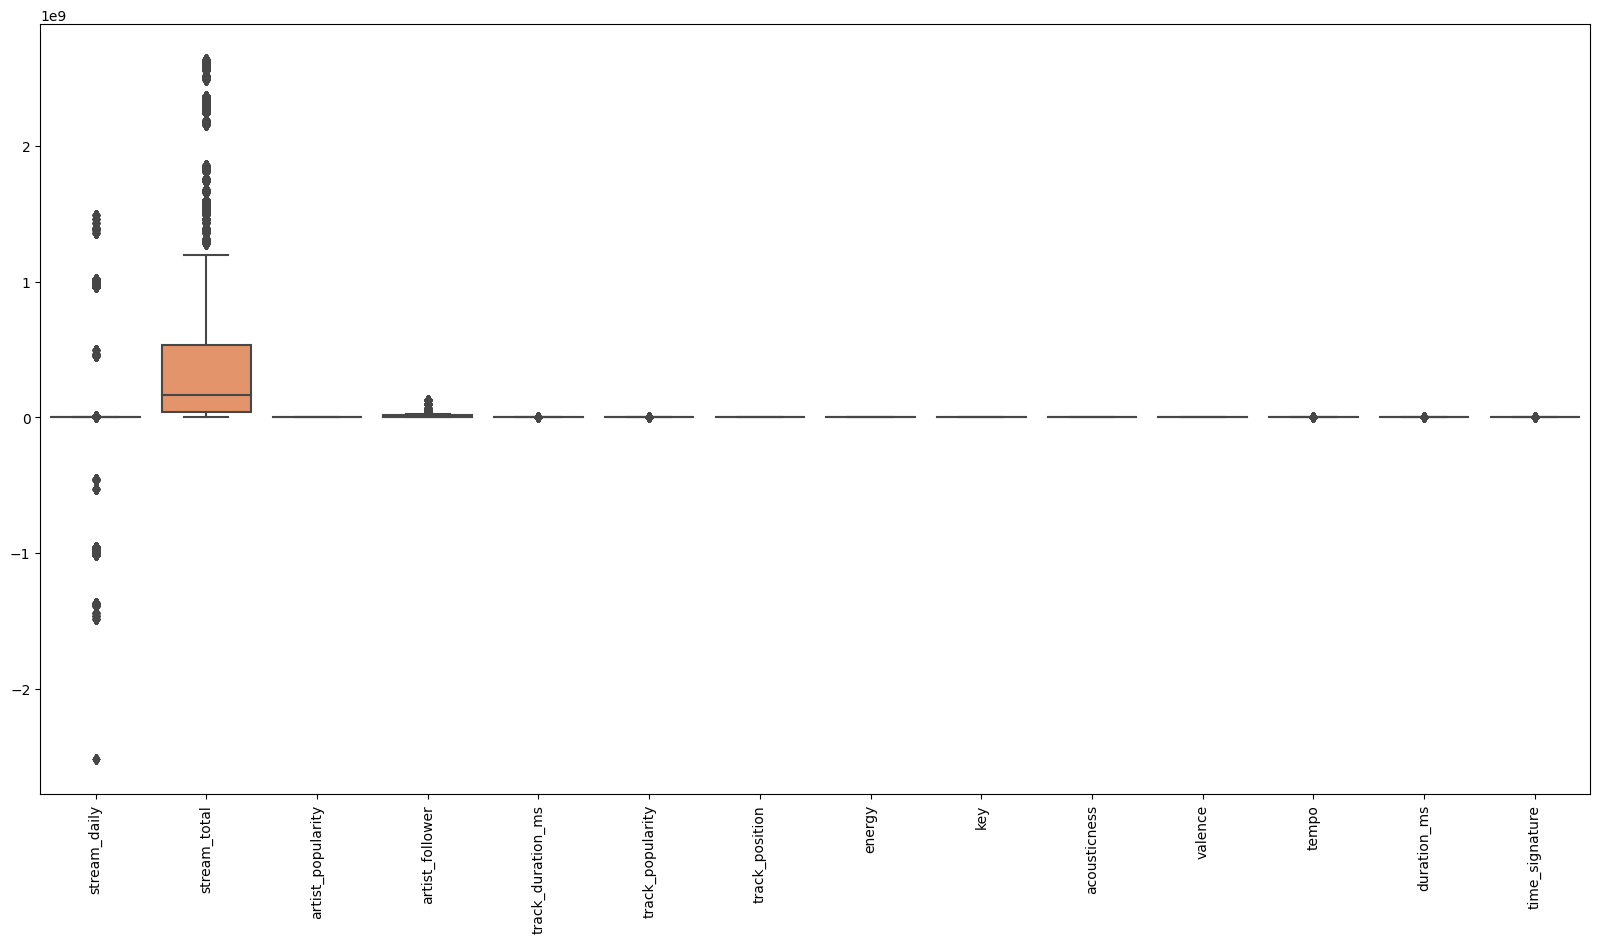

In [21]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[numerical])
plt.xticks(rotation=90)
plt.show()

Qua biểu đồ ta thấy có một số dữ liệu ngoại lai ở cột `steam_count`. Nhóm quyết định xóa những dòng này.

In [22]:
Q1 = df['stream_total'].quantile(0.25)
Q3 = df['stream_total'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['stream_total'] >= Q1 - 1.5*IQR) & (df['stream_total'] <= Q3 + 1.5*IQR)]
df.shape

(125646, 25)

### 1.4. Định dạng các cột, thêm xóa cột 

In [23]:
df.dtypes

track_id               object
date                   object
stream_daily            int64
stream_total            int64
artists_id             object
album_id               object
track_name             object
artist_name            object
artist_genres          object
artist_popularity       int64
artist_follower         int64
artist_image_url       object
track_release_date     object
track_date_added       object
track_duration_ms       int64
track_popularity        int64
track_position          int64
country                object
energy                float64
key                     int64
acousticness          float64
valence               float64
tempo                 float64
duration_ms             int64
time_signature          int64
dtype: object

In [24]:
# track_release_date chuyển sang kiểu datetime
df['track_release_date'] = pd.to_datetime(df['track_release_date'])
# Thêm cột year
df['year'] = df['track_release_date'].dt.year
# Thêm cột month
df['month'] = df['track_release_date'].dt.month
# Thêm cột day
df['day'] = df['track_release_date'].dt.day

In [25]:
# Thêm cột day_name với giá trị là tên của ngày trong tuần (Monday, Tuesday, ...)
df['day_name'] = df['track_release_date'].dt.day_name()

In [26]:
df.to_csv('data/clean_data.csv', index=False)

## 2. Phân tích dữ liệu

In [27]:
df = pd.read_csv('data/clean_data.csv')

### 2.1. Phân bố dữ liệu từng cột 

#### 2.1.1. track_name

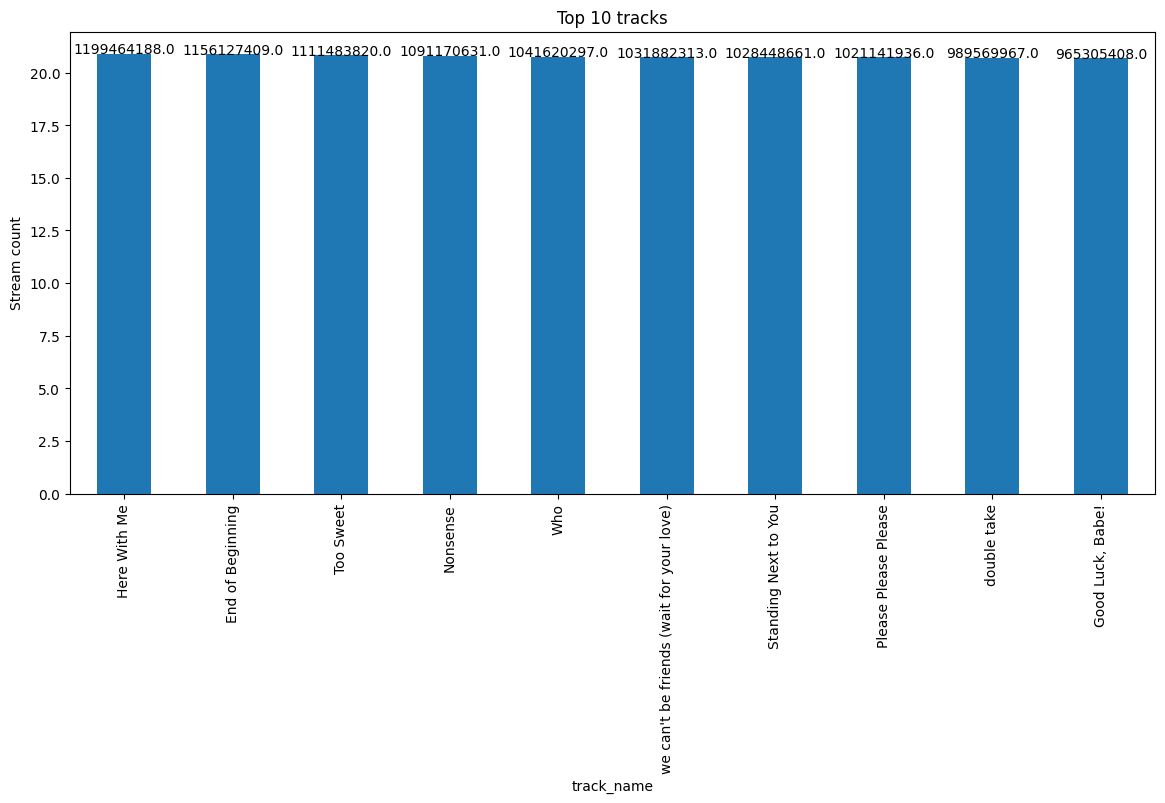

In [28]:
# Top 10 bài hát được nghe nhiều nhất
top_10 = df.groupby('track_name')['stream_total'].max().sort_values(ascending=False).head(10)
top_10 = np.log(top_10)

plt.figure(figsize=(14, 6))
top_10.plot(kind='bar')
plt.title('Top 10 tracks')
plt.ylabel('Stream count')
for index, value in enumerate(top_10):
    plt.text(index, value, str(round(np.exp(value), 2)), ha = 'center')
plt.show()

Nhận xét: 


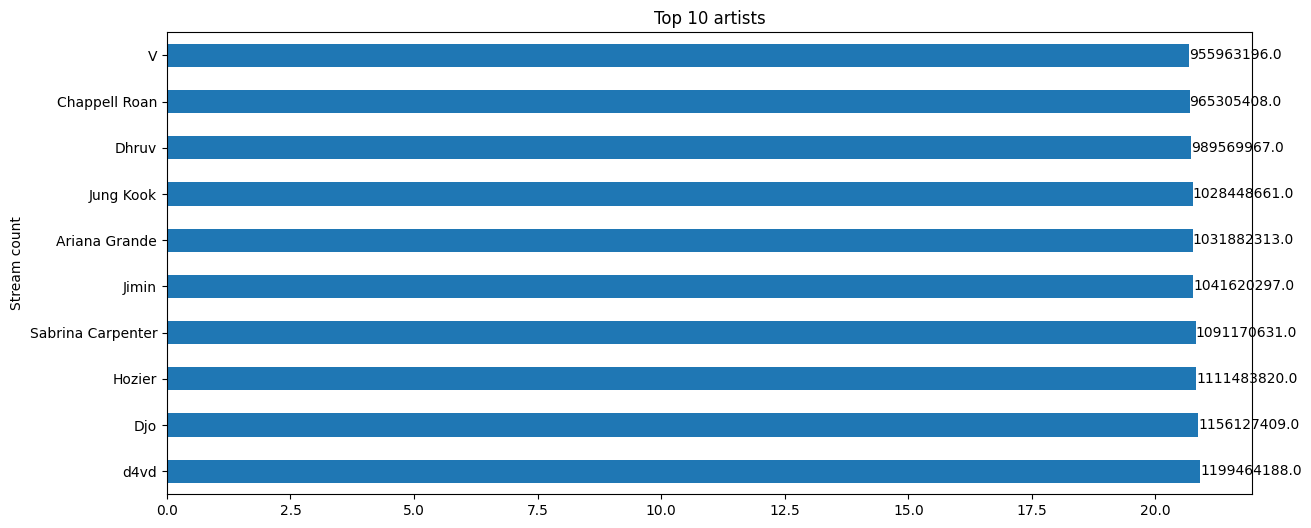

In [29]:
# Top 10 nghệ sĩ được nghe nhiều nhất
top_10 = df.groupby('artist_name')['stream_total'].max().sort_values(ascending=False).head(10)
top_10 = np.log(top_10)

plt.figure(figsize=(14, 6))
top_10.plot(kind='barh')
plt.title('Top 10 artists')
plt.ylabel('Stream count')
for index, value in enumerate(top_10):
    plt.text(value, index, str(round(np.exp(value), 2)), va = 'center')
plt.show()

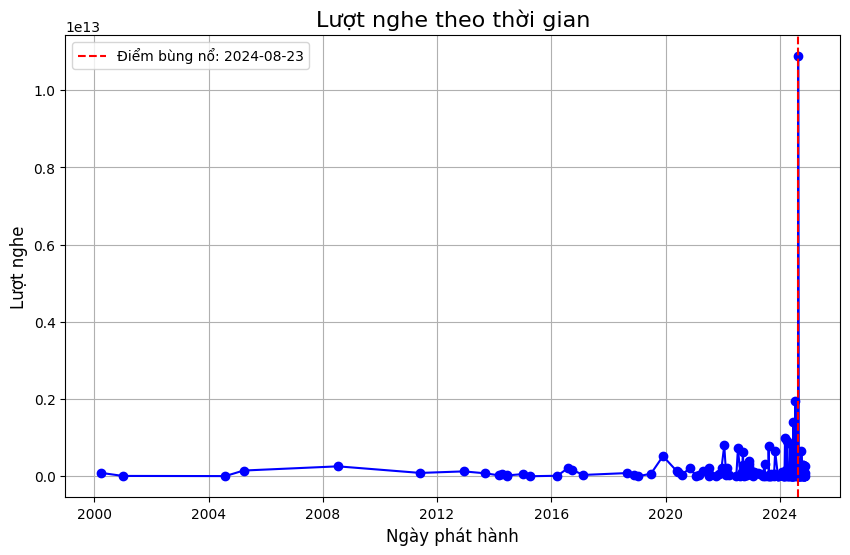

Điểm bùng nổ: 2024-08-23, Lượt nghe: 10883527157584


In [30]:
df['track_release_date'] = pd.to_datetime(df['track_release_date'])

# Loại bỏ các dòng trùng lặp
df = df.drop_duplicates()

# Tính tổng lượt nghe theo ngày
daily_streams = df.groupby('track_release_date')['stream_total'].sum()

# Xác định ngày có lượt nghe cao nhất
peak_date = daily_streams.idxmax()
peak_streams = daily_streams.max()

# Vẽ biểu đồ xu hướng lượt nghe
plt.figure(figsize=(10, 6))
plt.plot(daily_streams.index, daily_streams.values, marker='o', linestyle='-', color='b')
plt.title("Lượt nghe theo thời gian", fontsize=16)
plt.xlabel("Ngày phát hành", fontsize=12)
plt.ylabel("Lượt nghe", fontsize=12)
plt.axvline(peak_date, color='r', linestyle='--', label=f"Điểm bùng nổ: {peak_date.date()}")
plt.legend()
plt.grid()
plt.show()

# Kết quả
print(f"Điểm bùng nổ: {peak_date.date()}, Lượt nghe: {peak_streams}")

In [31]:
df['country'].unique()

array(['Thailand', 'Philippines', 'Indonesia', 'Malaysia', 'Singapore',
       'Vietnam'], dtype=object)

In [32]:
tf = df[df['track_release_date'] == pd.Timestamp('2024-08-23')]

# Lấy theo track_name, country, trak_duration_ms, stream_total, artist_name
tf[['track_name', 'country', 'track_duration_ms', 'stream_total', 'artist_name']].drop_duplicates()

,track_name,country,track_duration_ms,stream_total,artist_name
40959,Bed Chem,Malaysia,175459,244476387,Sabrina Carpenter
40960,Bed Chem,Malaysia,157279,244476387,Sabrina Carpenter
40961,Bed Chem,Malaysia,186365,244476387,Sabrina Carpenter
40962,Bed Chem,Philippines,157279,244476387,Sabrina Carpenter
40963,Bed Chem,Philippines,171869,244476387,Sabrina Carpenter
...,...,...,...,...,...
61786,Nonsense,Singapore,175459,1091170631,Sabrina Carpenter
61787,Nonsense,Singapore,186365,1091170631,Sabrina Carpenter
61788,Nonsense,Singapore,171869,1091170631,Sabrina Carpenter
61790,Nonsense,Singapore,223192,1091170631,Sabrina Carpenter


In [33]:
max_stream_song = df.loc[df['stream_total'].idxmax()]
print(max_stream_song[['track_name', 'stream_total']])

track_name      Here With Me
stream_total      1199464188
Name: 118708, dtype: object


In [34]:
# Group by track_release_date and find the song with the maximum stream count for each day
max_stream_per_day = df.loc[df.groupby('track_release_date')['stream_total'].idxmax()]

# Display the result
max_stream_per_day[['track_release_date', 'track_name', 'stream_total', 'artist_name']]

,track_release_date,track_name,stream_total,artist_name
120790,2000-03-21,Bye Bye Bye - From Deadpool and Wolverine Soun...,863579127,*NSYNC
105564,2001-01-01,Randomantic,42946720,James Reid
27261,2004-08-03,擱淺,87670858,Jay Chou
5842,2005-03-24,Hanggang Kailan - Umuwi Ka Na Baby,184842472,Orange & Lemons
105890,2008-07-14,The Man Who Can't Be Moved,785546159,The Script
...,...,...,...,...
1978,2024-11-08,Musika,112260206,Dionela
82394,2024-11-11,ดาวหางฮัลเลย์,58800142,fellow fellow
67209,2024-11-14,It's ok I'm ok,113471338,Tate McRae
29657,2024-11-15,The Astronaut,547656617,Jin


In [35]:
# Group by artist_name and count the number of songs for each artist
artist_song_count = df.groupby('artist_name')['track_name'].nunique()

# Filter artists with at least 2 songs in the top charts
top_artists = artist_song_count[artist_song_count >= 2].sort_values(ascending=False).head(10)

# Display the result
print(top_artists)

artist_name
Bernadya             6
Jin                  6
Sabrina Carpenter    5
Insomniacks          4
fellow fellow        3
Dionela              3
V                    3
HIEUTHUHAI           3
Hindia               3
Maki                 3
Name: track_name, dtype: int64


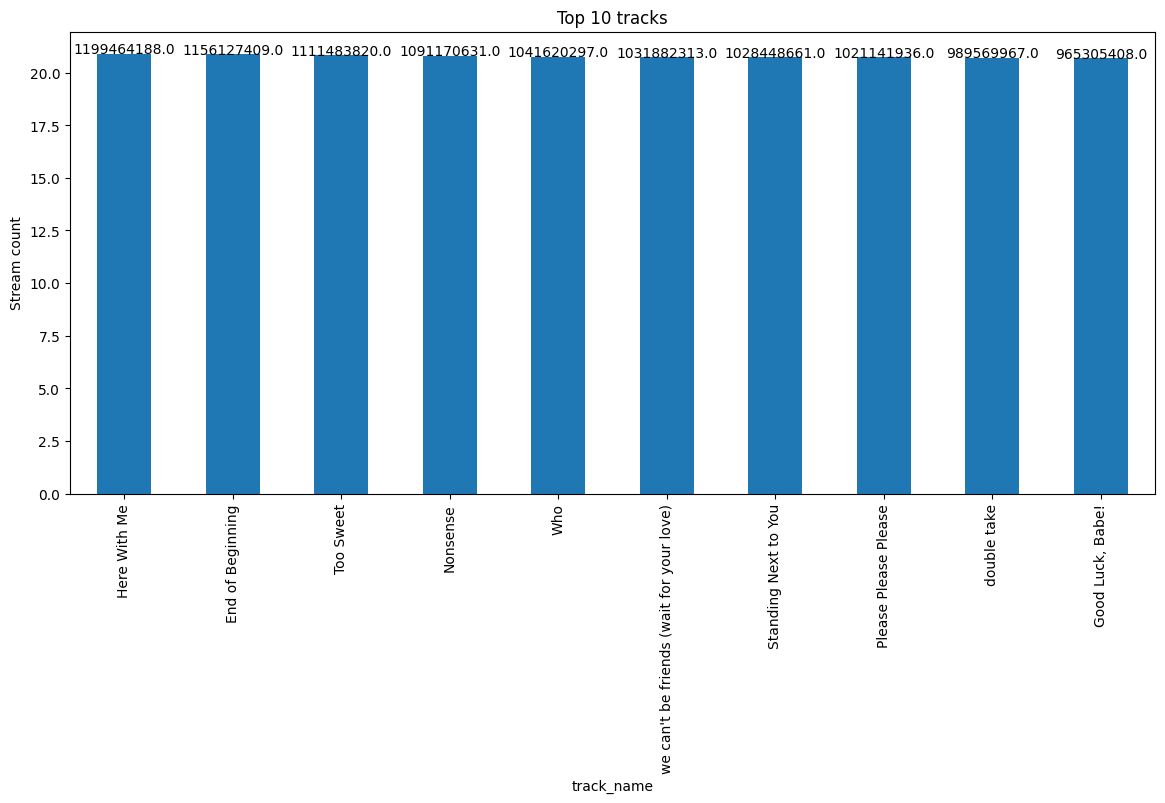

In [36]:
# Top bài hát được nghe nhiều nhất
top_10 = df.groupby('track_name')['stream_total'].max().sort_values(ascending=False).head(10)
top_10 = np.log(top_10)

plt.figure(figsize=(14, 6))
top_10.plot(kind='bar')
plt.title('Top 10 tracks')
plt.ylabel('Stream count')
for index, value in enumerate(top_10):
    plt.text(index, value, str(round(np.exp(value), 2)), ha = 'center')
plt.show()

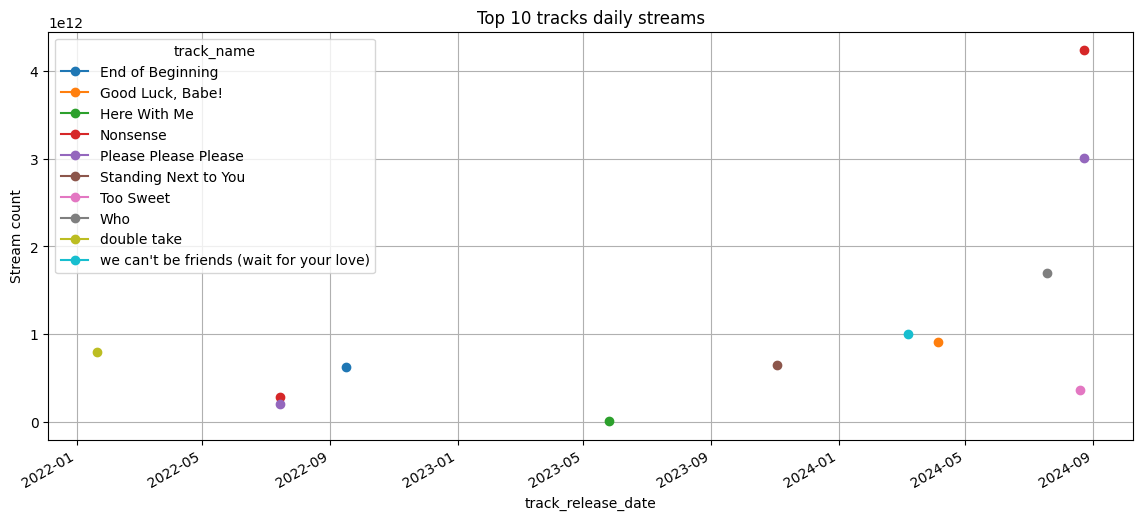

In [37]:
# stream_total theo ngày của top 10 bài hát được nghe nhiều nhất
top_10_songs = top_10.index
top_10_daily_streams = df[df['track_name'].isin(top_10_songs)].groupby(['track_release_date', 'track_name'])['stream_total'].sum().unstack()

plt.figure(figsize=(14, 6))
top_10_daily_streams.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Top 10 tracks daily streams')
plt.ylabel('Stream count')
plt.grid()
plt.show()


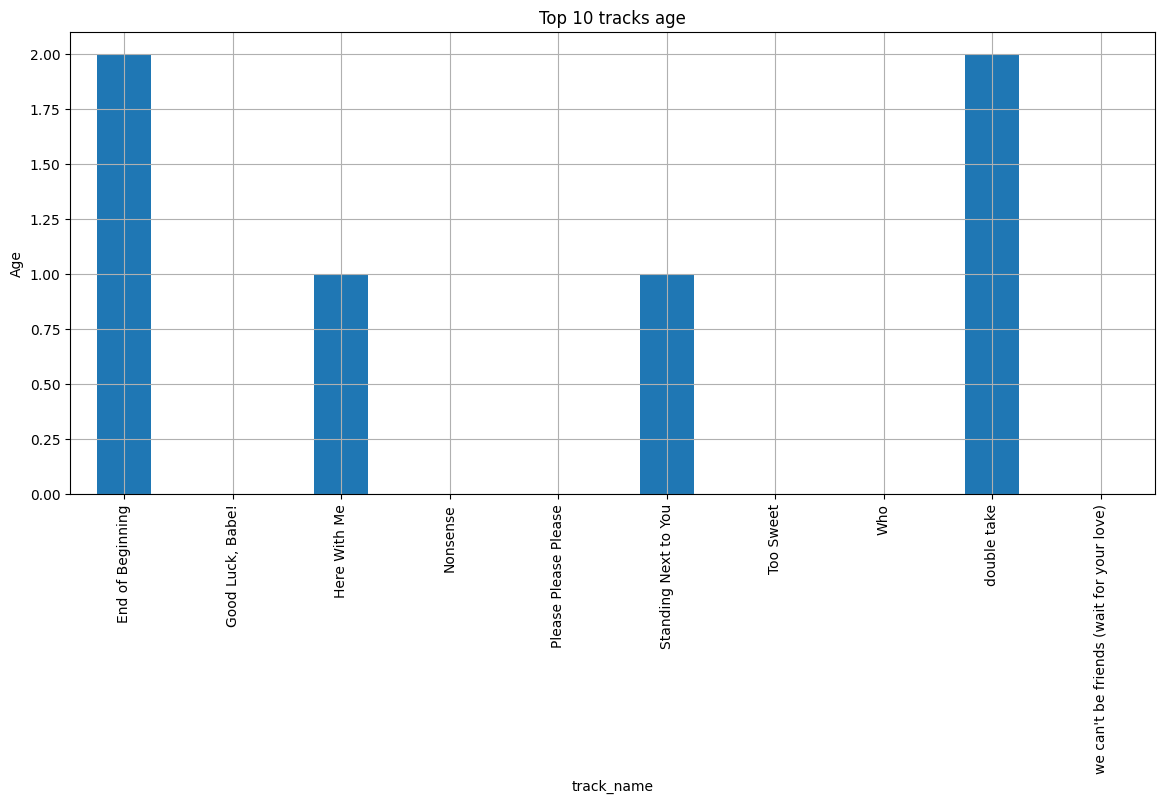

In [38]:
# tuổi của top 10 bài hát được nghe nhiều nhất ("Tuổi = 2024 - năm phát hành")
top_10_songs = top_10.index
top_10_age = df[df['track_name'].isin(top_10_songs)].groupby('track_name')['year'].max()
top_10_age = 2024 - top_10_age

plt.figure(figsize=(14, 6))
top_10_age.plot(kind='bar')
plt.title('Top 10 tracks age')
plt.ylabel('Age')
plt.grid()
plt.show()



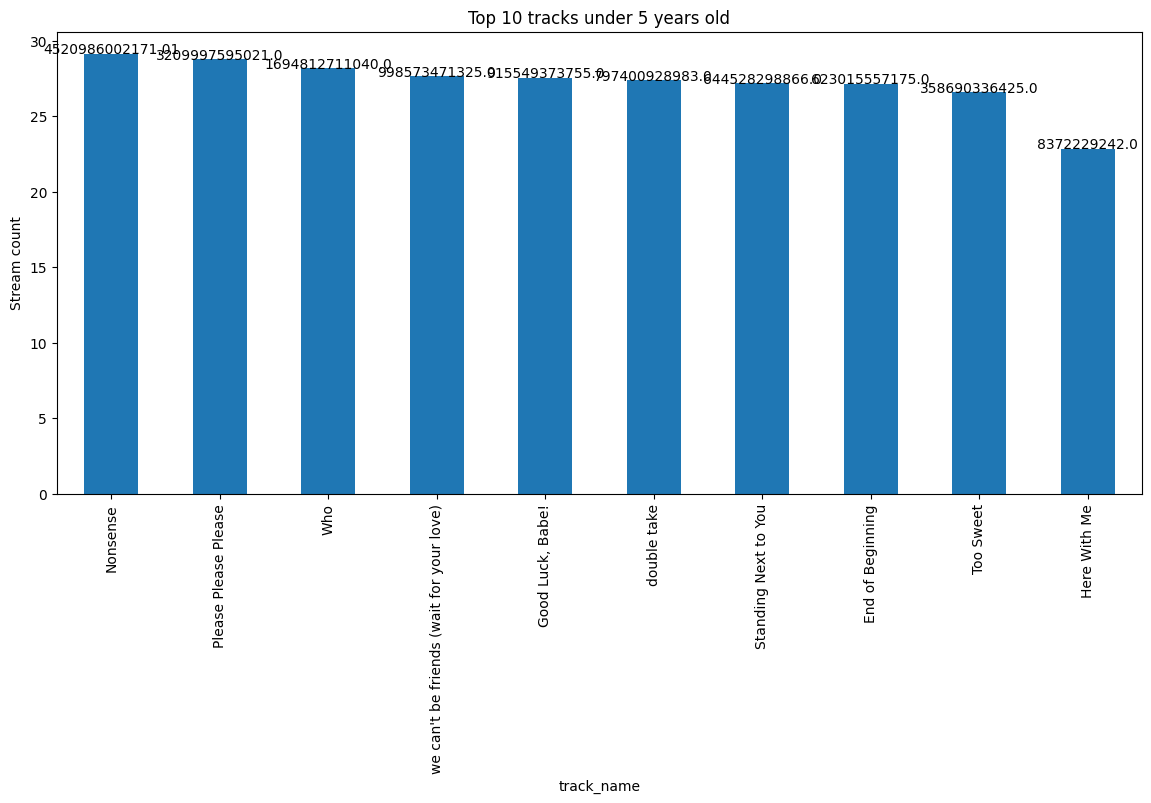

In [39]:
# Những bài hát dưới 5 tuổi được nghe nhiều nhất
top_10_songs = top_10_age[top_10_age < 5].index
top_10_songs_streams = df[df['track_name'].isin(top_10_songs)].groupby('track_name')['stream_total'].sum().sort_values(ascending=False).head(10)
top_10_songs_streams = np.log(top_10_songs_streams)

plt.figure(figsize=(14, 6))
top_10_songs_streams.plot(kind='bar')
plt.title('Top 10 tracks under 5 years old')
plt.ylabel('Stream count')
for index, value in enumerate(top_10_songs_streams):
    plt.text(index, value, str(round(np.exp(value), 2)), ha = 'center')
plt.show()


In [40]:
# Bài hát được nghe nhiều nhất của từng năm 
top_song_per_year = df.loc[df.groupby('year')['stream_total'].idxmax()][['year', 'track_name', 'stream_total']]
top_song_per_year

,year,track_name,stream_total
120790,2000,Bye Bye Bye - From Deadpool and Wolverine Soun...,863579127
105564,2001,Randomantic,42946720
27261,2004,擱淺,87670858
5842,2005,Hanggang Kailan - Umuwi Ka Na Baby,184842472
105890,2008,The Man Who Can't Be Moved,785546159
119009,2011,Seandainya,276873555
2952,2012,Tadhana,344667628
119276,2013,No. 1 Party Anthem,290160468
28691,2014,Duka,396320089
105358,2015,The Night We Met,10312


In [41]:
# Những bài hát này thuộc thể loại nào và của nghệ sĩ nào
top_song_per_year = df.loc[df.groupby('year')['stream_total'].idxmax()][['year', 'track_name', 'stream_total', 'artist_genres', 'artist_name']]
top_song_per_year


,year,track_name,stream_total,artist_genres,artist_name
120790,2000,Bye Bye Bye - From Deadpool and Wolverine Soun...,863579127,"['boy band', 'dance pop', 'pop']",*NSYNC
105564,2001,Randomantic,42946720,"['deep neofolk', 'opm', 'pinoy r&b']",James Reid
27261,2004,擱淺,87670858,"['c-pop', 'mandopop', 'taiwan pop', 'zhongguo ...",Jay Chou
5842,2005,Hanggang Kailan - Umuwi Ka Na Baby,184842472,['opm'],Orange & Lemons
105890,2008,The Man Who Can't Be Moved,785546159,"['celtic rock', 'pop']",The Script
119009,2011,Seandainya,276873555,['indonesian pop'],Vierra
2952,2012,Tadhana,344667628,['opm'],Up Dharma Down
119276,2013,No. 1 Party Anthem,290160468,"['garage rock', 'modern rock', 'permanent wave...",Arctic Monkeys
28691,2014,Duka,396320089,"['indonesian pop punk', 'indonesian rock']",Last Child
105358,2015,The Night We Met,10312,"['indie folk', 'stomp and holler']",Lord Huron


In [42]:
df_vn = df[df['country'] == 'Vietnam']
df_vn.head()

,track_id,date,stream_daily,stream_total,artists_id,album_id,track_name,artist_name,artist_genres,artist_popularity,...,key,acousticness,valence,tempo,duration_ms,time_signature,year,month,day,day_name
28713,0h7QMc9ZRzA9QJrbEHytn2,2024-11-02,660518,541913589,5vV3bFXnN6D6N3Nj4xRvaV,6nT2VfGN07ar1vdZyJY6ox,The Astronaut,Jin,['k-pop'],80,...,10,0.0351,0.736,148.887,181678,4,2024,10,25,Friday
28716,0h7QMc9ZRzA9QJrbEHytn2,2024-11-02,660518,541913589,5vV3bFXnN6D6N3Nj4xRvaV,6nT2VfGN07ar1vdZyJY6ox,The Astronaut,Jin,['k-pop'],80,...,10,0.0351,0.736,148.887,181678,4,2024,10,25,Friday
28719,0h7QMc9ZRzA9QJrbEHytn2,2024-11-02,660518,541913589,5vV3bFXnN6D6N3Nj4xRvaV,6nT2VfGN07ar1vdZyJY6ox,The Astronaut,Jin,['k-pop'],80,...,10,0.0351,0.736,148.887,181678,4,2024,10,25,Friday
28722,0h7QMc9ZRzA9QJrbEHytn2,2024-11-02,660518,541913589,5vV3bFXnN6D6N3Nj4xRvaV,6nT2VfGN07ar1vdZyJY6ox,The Astronaut,Jin,['k-pop'],80,...,10,0.0351,0.736,148.887,181678,4,2024,10,25,Friday
28725,0h7QMc9ZRzA9QJrbEHytn2,2024-11-02,660518,541913589,5vV3bFXnN6D6N3Nj4xRvaV,6nT2VfGN07ar1vdZyJY6ox,The Astronaut,Jin,['k-pop'],80,...,10,0.0351,0.736,148.887,181678,4,2024,10,25,Friday


### Việt Nam

In [43]:
df_vn.shape

(7745, 29)

#### Bài hát được nghe nhiều nhất ở Việt Nam 

In [44]:
max_stream_song_vn = df_vn.loc[df_vn['stream_total'].idxmax()]
print(max_stream_song_vn[['track_name', 'stream_total']])

track_name             Who
stream_total    1041620297
Name: 95255, dtype: object


#### Thông tin về bài hát được nghe nhiều nhất ở Việt Nam

In [45]:
# Thông tin về bài hát được nghe nhiều nhất ở Việt Nam
max_stream_song_vn

track_id                                         7tI8dRuH2Yc6RuoTjxo4dU
date                                                         2024-11-19
stream_daily                                                    6385318
stream_total                                                 1041620297
artists_id                                       1oSPZhvZMIrWW5I41kPkkY
album_id                                         15XcLhiVMlSOipUddTNDnr
track_name                                                          Who
artist_name                                                       Jimin
artist_genres                                                 ['k-pop']
artist_popularity                                                    88
artist_follower                                                 9770858
artist_image_url      https://i.scdn.co/image/ab6761610000e5ebcb0829...
track_release_date                                  2024-07-19 00:00:00
track_date_added                                   2024-11-04T12

#### Bài hát có stream lớn nhất theo ngày 

In [46]:
# nhóm theo track_release_date và tìm bài hát có lượt nghe cao nhất cho mỗi ngày
max_stream_per_day = df_vn.loc[df_vn.groupby('track_release_date')['stream_total'].idxmax()]

# Hiển thị kết quả
max_stream_per_day[['track_release_date', 'track_name', 'stream_total', 'artist_name']].sort_values(by='track_release_date')

,track_release_date,track_name,stream_total,artist_name
39199,2021-07-09,Không Thể Say,33137058,HIEUTHUHAI
125635,2022-06-24,Miên Man,25923775,Minh Huy
70363,2023-06-27,Love is,2277835,Dangrangto
68146,2023-07-31,id 072019,30247172,W/N
83089,2023-08-11,Love Me Again,955963196,V
39197,2023-10-16,Không Thể Say,33137058,HIEUTHUHAI
118692,2023-10-18,Simp Gái 808,25500558,Low G
80264,2023-11-03,Standing Next to You,1028448661,Jung Kook
89395,2023-12-12,nhắn nhủ,18561059,Ronboogz
89440,2024-03-01,Từng Là,22195833,Vũ Cát Tường


In [47]:
df_vn['track_release_date'].nunique()

20

In [48]:
df['track_release_date'].nunique()

146

Có 2 vấn đề: 
- Data theo Việt Nam chỉ có 20 ngày trong 3 năm
- Data tổng có 146 ngày 

#### Danh sách nghệ sỹ có từ 2 bài hát đạt top

In [49]:
# Nhóm theo artist_name và đếm số bài hát cho mỗi nghệ sĩ
artist_song_count_vn = df_vn.groupby('artist_name')['track_name'].nunique()

# Filter những nghệ sĩ có ít nhất 2 bài hát trong bảng xếp hạng
top_artists_vn = artist_song_count_vn[artist_song_count_vn >= 2].sort_values(ascending=False).head(10)
top_artists_vn

artist_name
Jin           6
HIEUTHUHAI    3
V             3
Jimin         2
LISA          2
aespa         2
Name: track_name, dtype: int64

Hầu hết là các nghệ sỹ nổi tiếng của Hàn Quốc thể loại nhạc đặc trưng là Kpop. Chỉ có 1 nghệ sỹ Việt Nam là HieuThuHai có 3 bài lọt top trong data được thu thập ở Việt Nam.

#### Lọt top 5 bao nhiêu ngày


In [50]:
# Lọc dữ liệu các bài hát lọt top 5 ở Việt Nam
top_5_vn = df_vn[df_vn['track_position'] <= 5]

# Đếm số ngày mỗi bài hát lọt top 5
top_5_vn_days = top_5_vn.groupby('track_name')['date'].nunique().reset_index(name='days_in_top_5')

# Hiển thị kết quả
top_5_vn_days.sort_values(by='days_in_top_5', ascending=False)

,track_name,days_in_top_5
1,Be Mine,22
6,Standing Next to You,22
8,Who,22
4,I'll Be There,21
7,The Astronaut,10
5,Running Wild,5
0,Another Level,4
2,Falling,4
3,I will come to you,4


#### Thời lượng trung bình của các bài hát lọt top

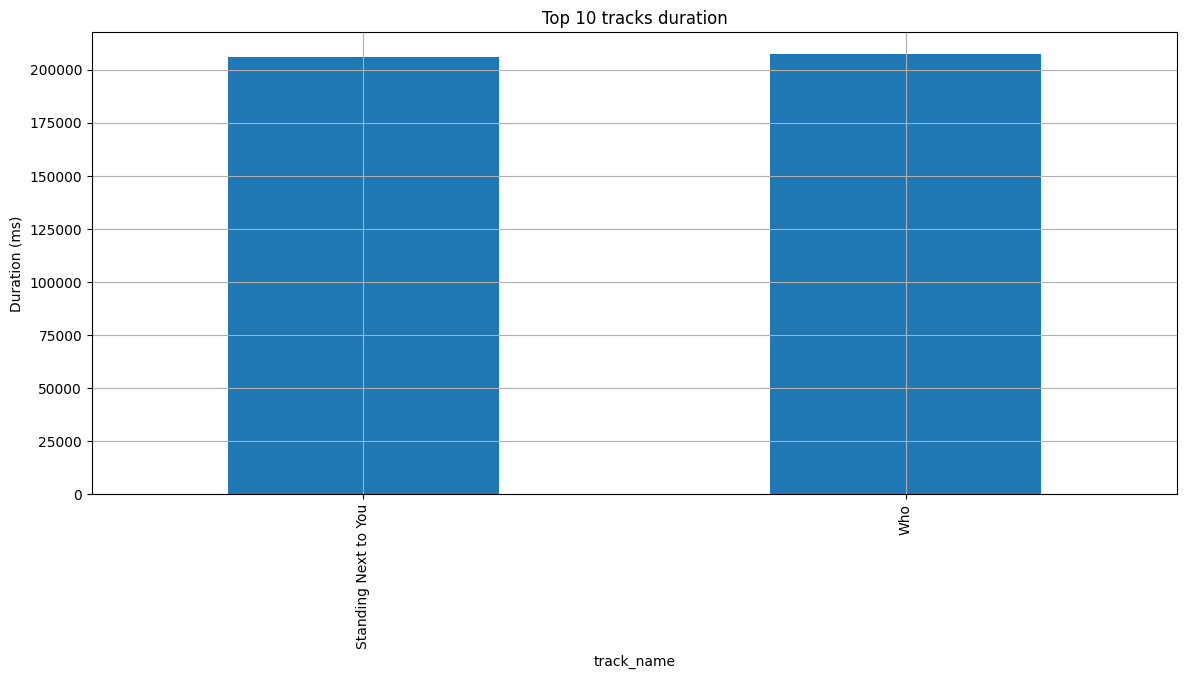

In [51]:
# thời luợng của top 10 bài hát được nghe nhiều nhất df_vn
top_10_songs = top_10.index
top_10_duration = df_vn[df_vn['track_name'].isin(top_10_songs)].groupby('track_name')['track_duration_ms'].max()

plt.figure(figsize=(14, 6))
top_10_duration.plot(kind='bar')
plt.title('Top 10 tracks duration')
plt.ylabel('Duration (ms)')
plt.grid()
plt.show()

# `Tạm thời để đây đi cập nhật data mà không push lên git đâu có để ý tốn công quá`